# 实验2 数据降维

## 实验所需要的库

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 读取csv中的标签与数据

In [108]:
# 示例：加载数据（假设数据在一个CSV文件中）
wine_data = pd.read_csv('Wine.csv')

# 检查数据结构
print(wine_data.head())

# 如果有目标变量（如分类标签），分离目标变量和特征,目标是Customer_Segment
features = wine_data.drop(columns=['Customer_Segment'])
labels = wine_data['Customer_Segment']

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     105

## 对特征进行标准化

因为PCA对缩放较为敏感所以要进行标准化

## 应用PCA

标准化后进行计算，采用奇异值分解法。这种分解法的精度比特征值分解更高

In [109]:
# 定义标准化函数
def standardize_data(features):
    mean = np.mean(features, axis=0)
    std_dev = np.std(features, axis=0)
    scaled_features = (features - mean) / std_dev
    return scaled_features, mean, std_dev

# 定义PCA函数
def pca(features, num_components):
    # 标准化数据
    scaled_features, _, _ = standardize_data(features)
    
    # 使用奇异值分解来计算特征向量
    U, S, Vt = np.linalg.svd(scaled_features, full_matrices=False)
    
    # 选择前 num_components 个特征向量，并将其符号取反
    top_k_eigenvectors = -Vt[:num_components]  # 将特征向量的符号取反
    
    # 将数据投影到选定的特征向量上
    projected_data = np.dot(scaled_features, top_k_eigenvectors.T)
    
    return projected_data

In [110]:
scaled_features, mean, std_dev = standardize_data(wine_data)
num_components = 2
principal_components = pca(wine_data, num_components)
print(principal_components)

[[ 3.5229339  -1.45309844]
 [ 2.52885806  0.33001925]
 [ 2.78502898 -1.03693595]
 [ 3.92258841 -2.76821026]
 [ 1.40751111 -0.86777309]
 [ 3.28812981 -2.13017513]
 [ 2.75057754 -1.17916999]
 [ 2.39286652 -1.61128232]
 [ 2.79525633 -0.92317952]
 [ 3.00559666 -0.79628417]
 [ 3.67868855 -1.31252342]
 [ 2.10963477 -0.61298199]
 [ 2.43845636 -0.67852331]
 [ 3.67349453 -1.14012136]
 [ 4.44157575 -2.11031917]
 [ 2.60892387 -1.66641801]
 [ 2.47542846 -2.33089672]
 [ 2.22623243 -1.63359016]
 [ 3.74226929 -2.52840527]
 [ 2.3944115  -1.06452946]
 [ 3.33656895 -0.79601279]
 [ 1.48140399 -0.24008547]
 [ 2.82806867  0.08685755]
 [ 2.00771405  0.51561649]
 [ 2.11463604  0.31592057]
 [ 1.39753751 -0.93821529]
 [ 2.13348803 -0.68710205]
 [ 1.62970383  0.09118403]
 [ 2.50760753 -0.69274983]
 [ 2.55948318 -0.1954729 ]
 [ 2.77244452 -1.24635279]
 [ 2.93513374 -1.47827883]
 [ 1.99124842 -0.05325201]
 [ 2.24570987 -1.6346691 ]
 [ 1.78698628 -0.69748039]
 [ 2.22763867 -0.17928892]
 [ 1.76802847 -0.65787231]
 

### 创建带有主成分的dataframe

In [111]:
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
final_df = pd.concat([principal_df, labels], axis=1)

## 绘制散点图

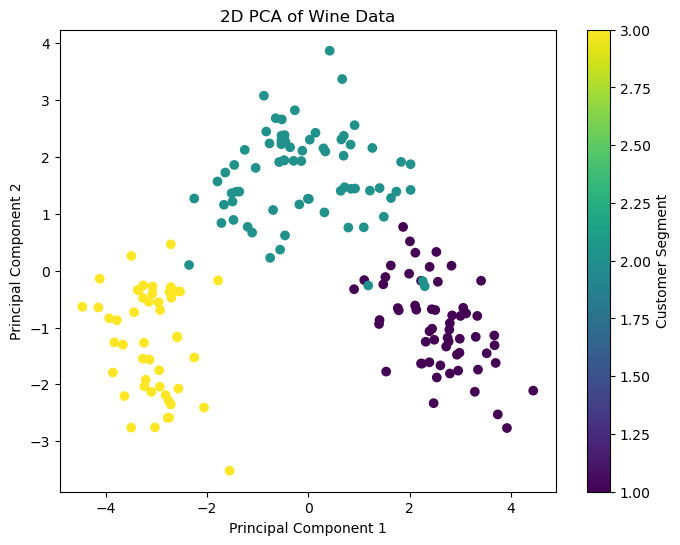

In [112]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(final_df['Principal Component 1'], final_df['Principal Component 2'], c=final_df['Customer_Segment'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Wine Data')
plt.colorbar(scatter, label='Customer Segment')
plt.show()